# Solved Examples

In [359]:
from sklearn.datasets import load_iris
iris = load_iris()
A = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print("Feature names:", feature_names)
print("Target names:", target_names)
print("\nFirst 10 rows of A:\n", A[:10])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

First 10 rows of A:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv('hepatitis_csv.csv')
# get the locations
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(147, 19) (8, 19) (147,) (8,)


# QUESTIONS

Consider the hepatitis/ pima-indians-diabetes csv file, perform the following date pre-processing
1. Load data in Pandas.
2. Drop columns that aren’t useful.
3. Drop rows with missing values.
4. Create dummy variables.
5. Take care of missing data.
6. Convert the data frame to NumPy.
7. Divide the data set into training data and test data

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("hepatitis_csv.csv")
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [184]:
print(data.describe())
print(data.info())

              age   bilirubin  alk_phosphate       sgot     albumin  \
count  155.000000  149.000000     126.000000  151.00000  139.000000   
mean    41.200000    1.427517     105.325397   85.89404    3.817266   
std     12.565878    1.212149      51.508109   89.65089    0.651523   
min      7.000000    0.300000      26.000000   14.00000    2.100000   
25%     32.000000    0.700000      74.250000   31.50000    3.400000   
50%     39.000000    1.000000      85.000000   58.00000    4.000000   
75%     50.000000    1.500000     132.250000  100.50000    4.200000   
max     78.000000    8.000000     295.000000  648.00000    6.400000   

          protime  
count   88.000000  
mean    61.852273  
std     22.875244  
min      0.000000  
25%     46.000000  
50%     61.000000  
75%     76.250000  
max    100.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           -------

In [185]:
data.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [186]:
data.corr()

,age,antivirals,bilirubin,alk_phosphate,sgot,albumin,protime,histology
age,1.000000,0.013100,0.125463,0.008924,0.082545,-0.262981,-0.222233,0.170780
antivirals,0.013100,1.000000,-0.185023,-0.205236,-0.108138,0.170074,0.030287,-0.209242
bilirubin,0.125463,-0.185023,1.000000,0.220062,0.232967,-0.377318,-0.302608,0.262428
alk_phosphate,0.008924,-0.205236,0.220062,1.000000,0.239581,-0.403857,-0.226846,0.284914
sgot,0.082545,-0.108138,0.232967,0.239581,1.000000,-0.136276,-0.189149,0.131125
albumin,-0.262981,0.170074,-0.377318,-0.403857,-0.136276,1.000000,0.424419,-0.324751
protime,-0.222233,0.030287,-0.302608,-0.226846,-0.189149,0.424419,1.000000,-0.312062
histology,0.170780,-0.209242,0.262428,0.284914,0.131125,-0.324751,-0.312062,1.000000


In [187]:
data.drop("protime", axis = 1, inplace=True)

In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  histology       

In [189]:
data = data.fillna(data.median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          155 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          155 non-null    object 
 5   malaise          155 non-null    object 
 6   anorexia         155 non-null    object 
 7   liver_big        155 non-null    object 
 8   liver_firm       155 non-null    object 
 9   spleen_palpable  155 non-null    object 
 10  spiders          155 non-null    object 
 11  ascites          155 non-null    object 
 12  varices          155 non-null    object 
 13  bilirubin        155 non-null    float64
 14  alk_phosphate    155 non-null    float64
 15  sgot             155 non-null    float64
 16  albumin          155 non-null    float64
 17  histology       

/tmp/ipykernel_13680/3267331144.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median())


In [190]:
cat_cols = data.select_dtypes(include = ['object', 'bool']).columns.to_list()
print(cat_cols)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_cols:
    le.fit(data[i])
    data[i] = le.transform(data[i])
cat_cols = data.select_dtypes(include = ['object', 'bool']).columns.to_list()
print(cat_cols)

['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 'varices', 'histology', 'class']
[]


Text(0.5, 1.0, 'sgot')

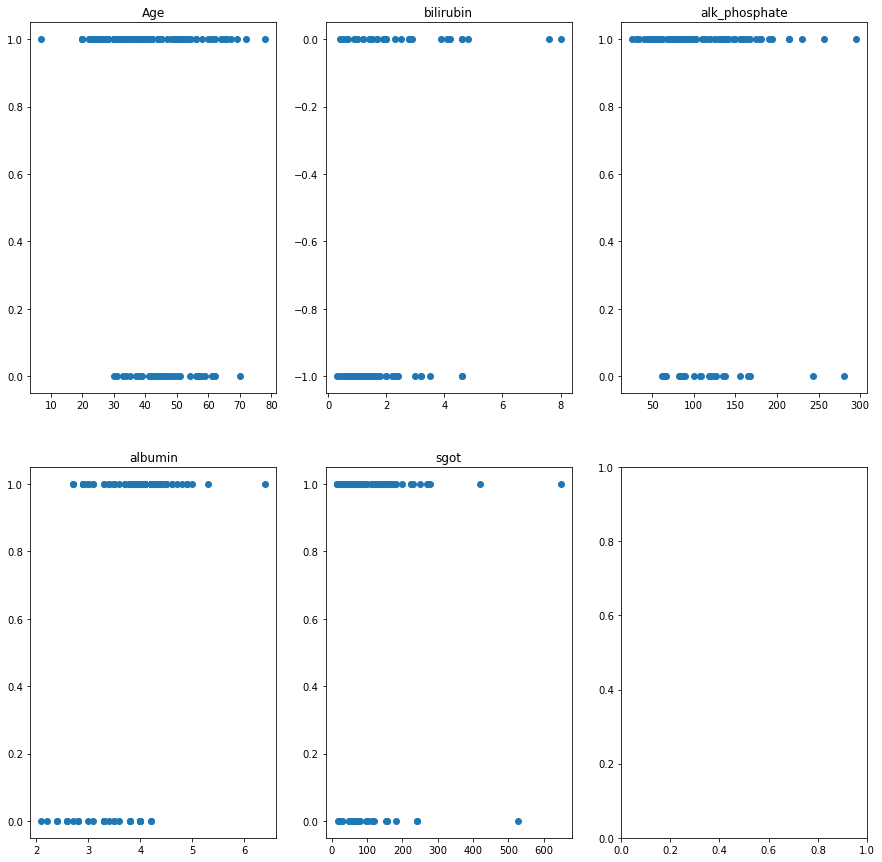

In [191]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)
fig.set_figheight(15)
fig.set_figwidth(15)
ax1.scatter(data["age"],data["class"])
ax1.set_title("Age")
ax2.scatter(data["bilirubin"],-data["class"])
ax2.set_title("bilirubin")
ax3.scatter(data["alk_phosphate"],data["class"])
ax3.set_title("alk_phosphate")
ax4.scatter(data["albumin"],data["class"])
ax4.set_title("albumin")
ax5.scatter(data["sgot"],data["class"])
ax5.set_title("sgot")

In [192]:
data["class"].value_counts()

1    123
0     32
Name: class, dtype: int64

In [193]:
data.corr()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
age,1.000000,0.008126,-0.090466,0.013100,0.278701,0.117876,-0.088317,-0.089629,0.092001,0.061277,0.156545,0.055314,0.039229,0.115205,0.017954,0.080267,-0.237422,0.170780,-0.219647
sex,0.008126,1.000000,-0.048985,0.089249,0.070059,0.030523,-0.015886,-0.081830,0.078642,0.048478,0.033192,-0.130587,-0.056792,-0.051354,0.099693,-0.014837,0.007624,-0.137450,0.173051
steroid,-0.090466,-0.048985,1.000000,-0.043961,-0.175451,-0.240139,-0.073644,0.201478,-0.068376,-0.074816,-0.027290,0.031046,0.073548,-0.043113,-0.050403,-0.039864,0.203763,-0.095367,0.137413
antivirals,0.013100,0.089249,-0.043961,1.000000,-0.061339,-0.016251,-0.042072,-0.054746,0.099213,-0.164548,-0.147909,-0.164747,-0.155148,-0.181197,-0.167796,-0.104251,0.156971,-0.209242,0.130196
fatigue,0.278701,0.070059,-0.175451,-0.061339,1.000000,0.589030,0.372957,-0.099759,0.247505,0.186846,0.367948,0.281439,0.180511,0.272476,0.151831,0.197874,-0.308189,0.146579,-0.306049
malaise,0.117876,0.030523,-0.240139,-0.016251,0.589030,1.000000,0.600545,-0.041697,0.091832,0.006470,0.307173,0.320228,0.161422,0.300650,0.194481,0.204942,-0.286767,0.144667,-0.339530
anorexia,-0.088317,-0.015886,-0.073644,-0.042072,0.372957,0.600545,1.000000,-0.079685,0.052781,0.032536,0.287366,0.184053,0.163378,0.298684,0.123724,0.233652,-0.156385,0.081623,-0.133638
liver_big,-0.089629,-0.081830,0.201478,-0.054746,-0.099759,-0.041697,-0.079685,1.000000,-0.479779,-0.095959,-0.215566,0.116465,0.049453,0.008483,-0.142757,0.046752,-0.053902,-0.060262,-0.093665
liver_firm,0.092001,0.078642,-0.068376,0.099213,0.247505,0.091832,0.052781,-0.479779,1.000000,0.180607,0.345553,0.010196,0.208047,0.045090,0.354953,0.099230,-0.190284,0.157118,-0.020057
spleen_palpable,0.061277,0.048478,-0.074816,-0.164548,0.186846,0.006470,0.032536,-0.095959,0.180607,1.000000,0.282523,0.103709,0.230190,0.194900,0.257954,-0.019089,-0.205924,0.211702,-0.234261


In [194]:
X = data[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'albumin', 'histology']]
y = data["class"]

In [230]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 60,test_size=0.15)

In [231]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [232]:
model.score(X_train,y_train)

0.42432277708932653

In [238]:
model.predict(X_test)

array([ 0.77380646,  0.83639318,  0.72410587,  0.83999763,  0.24023691,
        0.20659475,  0.96011906,  0.57878547,  0.68085138,  1.02387743,
        0.5131176 , -0.16348384,  0.88161576,  0.7475636 ,  1.0103694 ,
        1.00313268,  0.54050185,  0.9404863 ,  0.13960213,  1.04821189,
        0.80606367,  0.78440106,  1.07527762,  0.81960136])

In [239]:
model.score(X_test,y_test)

0.6214245249556773

## Diabetes Dataset

In [291]:
df= pd.read_csv("diabetes_csv.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [306]:
print(df.shape)
print(df.info())
print(df.describe())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      28.614922  148.888587  

In [307]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [315]:
df['Insulin'] = df['Insulin'].replace(0,np.NaN)

In [316]:
# df['Glucose'].fillna(df['Glucose'].median(), inplace =True)
# df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace =True)
# df['BMI'].fillna(df['BMI'].median(), inplace =True)



# by_Glucose_Age_Insulin_Grp = df.groupby(['Glucose'])
# def fill_Insulin(series):
#     return series.fillna(series.median())
# df['Insulin'] = by_Glucose_Age_Insulin_Grp['Insulin'].transform(fill_Insulin)
# df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

# by_BMI_Insulin = df.groupby(['BMI'])
# def fill_Skinthickness(series):
#     return series.fillna(series.mean())
# df['SkinThickness'] = by_BMI_Insulin['SkinThickness'].transform(fill_Skinthickness)

# df['SkinThickness'].fillna(df['SkinThickness'].mean(),inplace= True)


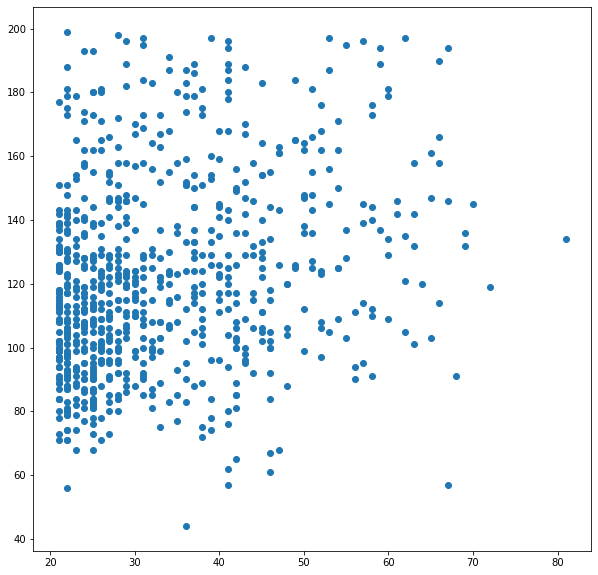

In [328]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df.Age,df.Glucose)

In [334]:
y = df.Glucose
x = df.Age
print(x.shape,y.shape)

(768,) (768,)


In [350]:
x_train,x_test,y_train,y_test  = x[:600],x[600:],y[:600],y[600:]
sumxtrain = x_train.sum()
sumxtest = x_test.sum()
sumytrain = y_train.sum()
sumytest = y_test.sum()
np_x_train = np.array(x_train)
np_x_test = np.array(x_test)
np_y_train = np.array(y_train)
np_y_test = np.array(y_test)
xtrain_ytrain = sumxtrain*sumytrain
xtest_ytest = sumxtest*sumytest
xsquare = np_x_train**2
sumxsquare = xsquare.sum()
n = len(x_train)

In [351]:
b = (n*xtrain_ytrain - sumxtrain*sumytrain)/((n*sumxsquare) - (sumxtrain)**2)

In [352]:
print(b)

17301.658511749538


In [353]:
a = 1/n*(sumytrain - b*sumxtrain)

In [355]:
print("Equation: ",a,"+",b,"x =","y")

Equation:  -575649.249173505 + 17301.658511749538 x = y
